In [96]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [97]:
# Load CSV file into a Pandas DataFrame
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

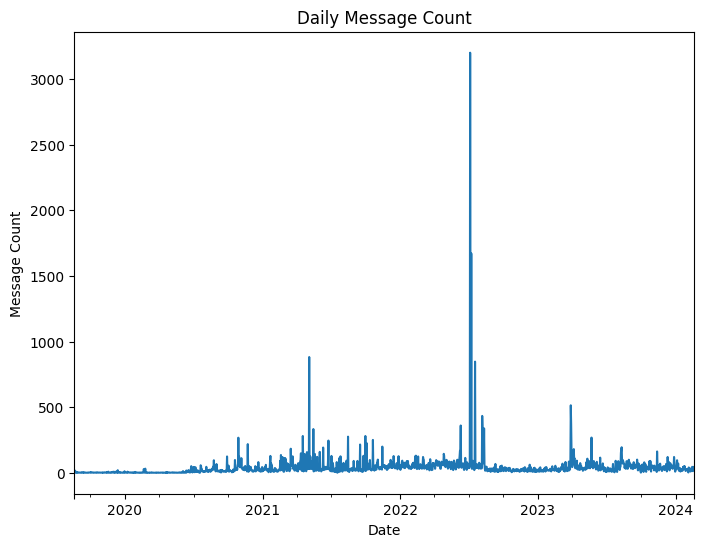

In [98]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure for Daily Message Count
plt.figure(figsize=(8, 6))

# Plot time series data - Daily Message Count
df.set_index('Date')['Content'].resample('D').count().plot(title='Daily Message Count')
plt.xlabel('Date')
plt.ylabel('Message Count')

# Show the plot
plt.show()

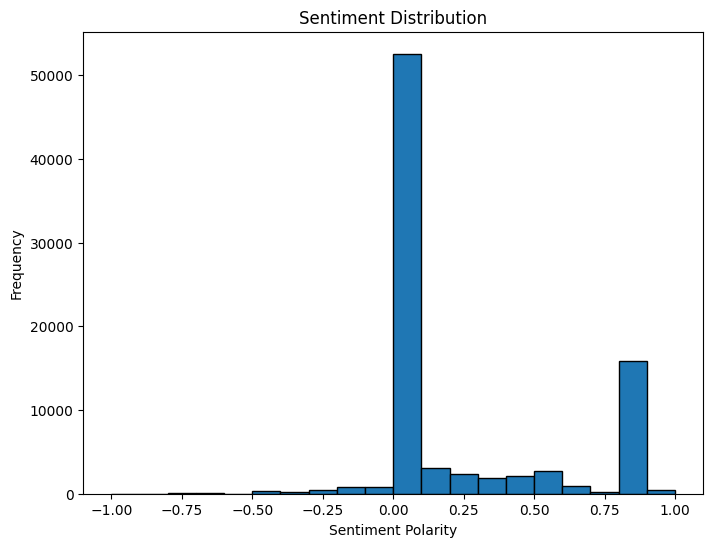

In [99]:
# Check for missing values
df['Content'].fillna('N/A', inplace=True)

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Create a figure for Sentiment Distribution
plt.figure(figsize=(8, 6))

# Plot sentiment distribution
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [100]:
print(df.columns)

Index(['Channel', 'AuthorID', 'Author', 'Date', 'Content', 'Attachments',
       'Reactions', 'sentiment'],
      dtype='object')


In [101]:
# Convert 'Date' column to datetime format
#df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# Check for missing values
df['Content'].fillna('N/A', inplace=True)

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Print the DataFrame with sentiment scores
print(df[['Date', 'Content', 'sentiment']])


                     Date                                            Content  \
0     2023-03-29 01:02:00                      gm 👋 :Water_Wave: :Oceancopy:   
1     2023-03-29 16:37:00              Good morning to all the @🧑‍💻Builder 🌊   
2     2023-03-29 16:37:00         **@White Rider just advanced to level 4!**   
3     2023-03-29 16:40:00  https://tenor.com/view/hello-there-baby-yoda-m...   
4     2023-03-29 16:40:00                            Good morning everyone 😀   
...                   ...                                                ...   
84749 2023-12-23 20:25:00                                                N/A   
84750 2024-01-19 20:22:00                                                N/A   
84751 2024-01-30 22:51:00                                                N/A   
84752 2024-02-06 19:05:00                               partnership proposal   
84753 2024-02-06 22:29:00  Thanks for reaching out) \n\nYou can submit yo...   

       sentiment  
0         0.0000  
1

In [102]:
print(df.columns)

Index(['Channel', 'AuthorID', 'Author', 'Date', 'Content', 'Attachments',
       'Reactions', 'sentiment'],
      dtype='object')


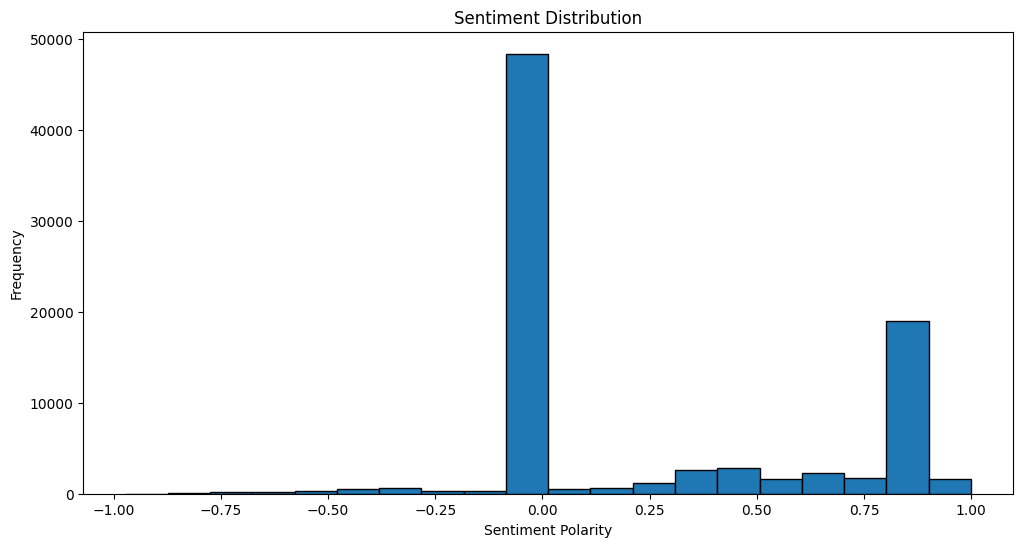

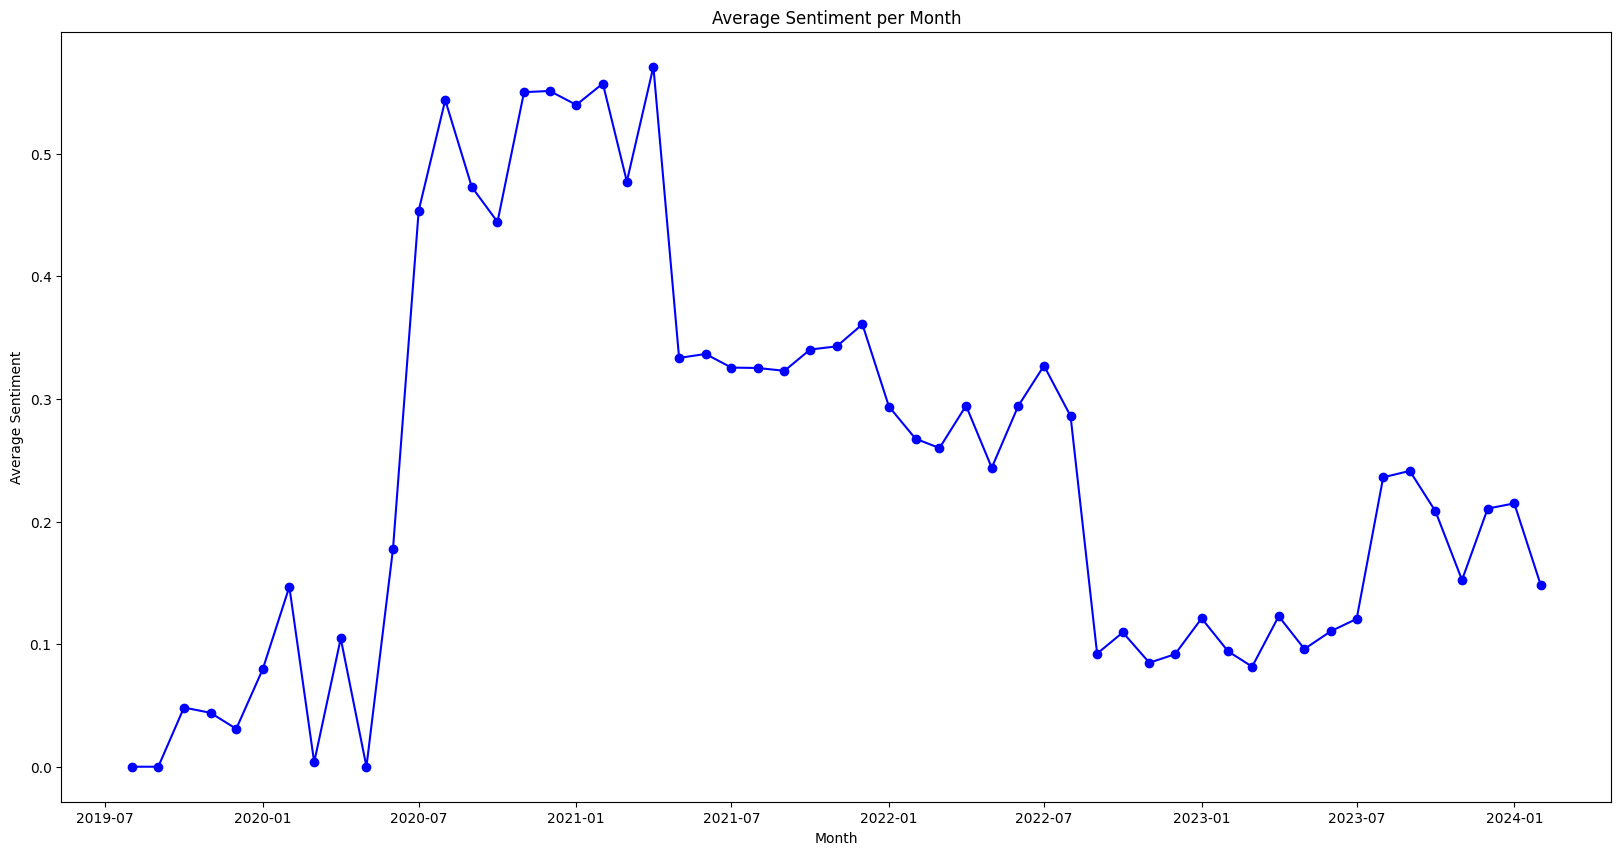

In [105]:
# Set 'Date' column as the index
#df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')
df.set_index('Date', inplace=True)

# Check for missing values and fill with 'N/A'
df['Content'].fillna('N/A', inplace=True)

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Resample data to monthly frequency and calculate average sentiment
monthly_sentiment = df.resample('MS')['sentiment'].agg(['mean', 'count'])

# Plot histogram of sentiment scores per month
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Plot average sentiment per month
plt.figure(figsize=(20, 10))
plt.plot(monthly_sentiment.index, monthly_sentiment['mean'], marker='o', linestyle='-', color='b')
plt.title('Average Sentiment per Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

# Show the plots
plt.show()

In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Specify the path to the folder containing CSV files
folder_path = 'Channels'
output_folder = 'Plots'
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create the 'plots' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        # Load CSV file into a Pandas DataFrame with 'Channel' as header
        df = pd.read_csv(file_path)

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

        # Check for missing values and fill with 'N/A'
        df['Content'].fillna('N/A', inplace=True)

        # Create a SentimentIntensityAnalyzer object
        sid = SentimentIntensityAnalyzer()

        # Apply sentiment analysis to 'Content' column
        df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

        # Resample data to monthly frequency and calculate average sentiment
        monthly_sentiment = df.groupby(df['Date'].dt.to_period("M")).agg({'sentiment': ['mean', 'count']}).reset_index()

        # Convert 'Date' back to string for plotting
        monthly_sentiment['Date'] = monthly_sentiment['Date'].astype(str)

        # Plot histogram of sentiment scores per month
        plt.figure(figsize=(12, 6))
        plt.hist(df['sentiment'], bins=20, edgecolor='black')
        plt.title(f'Sentiment Distribution - {filename}')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')

        # Save the histogram plot
        output_path_hist = os.path.join(output_folder, f'{filename}_sentiment_distribution.png')
        plt.savefig(output_path_hist)
        plt.close()

        # Plot average sentiment per month
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_sentiment['Date'], monthly_sentiment['sentiment']['mean'], marker='o', linestyle='-', color='b')
        plt.title(f'Average Sentiment per Month - {filename}')
        plt.xlabel('Month')
        plt.ylabel('Average Sentiment')
        plt.xticks(rotation='vertical')

        # Save the average sentiment plot
        output_path_avg = os.path.join(output_folder, f'{filename}_average_sentiment.png')
        plt.savefig(output_path_avg)
        plt.close()


/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/2155098078.py:50: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/2155098078.py:50: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/2155098078.py:63: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_avg)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/2155098078.py:63: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  plt.savefig(output_path_avg)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/2155098078.py:50: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


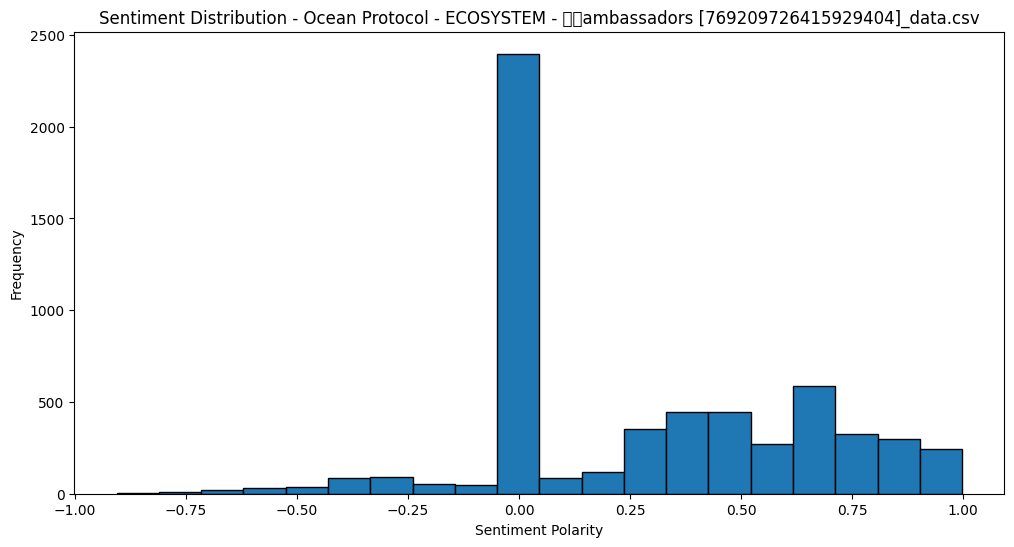

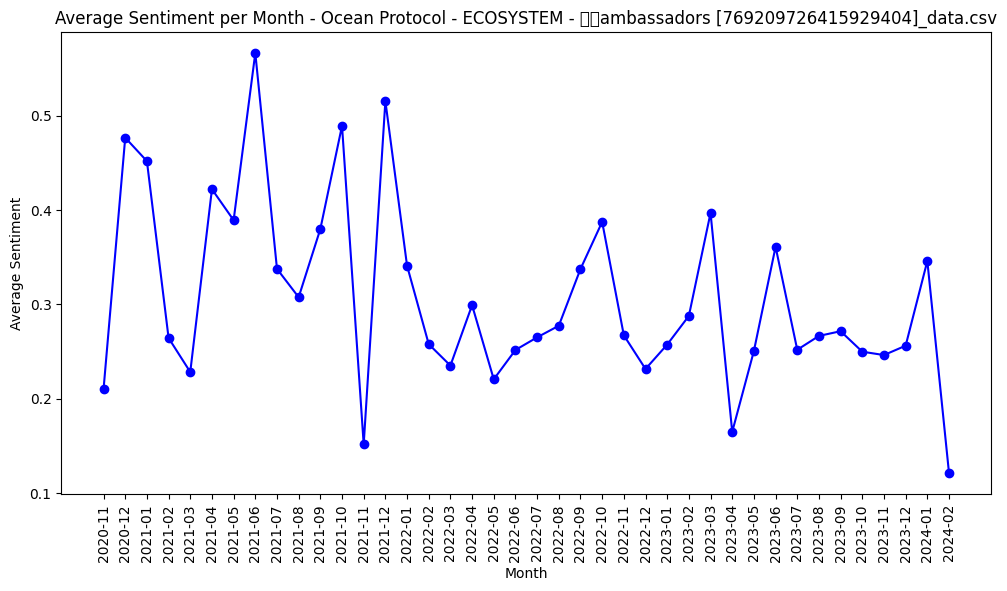

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


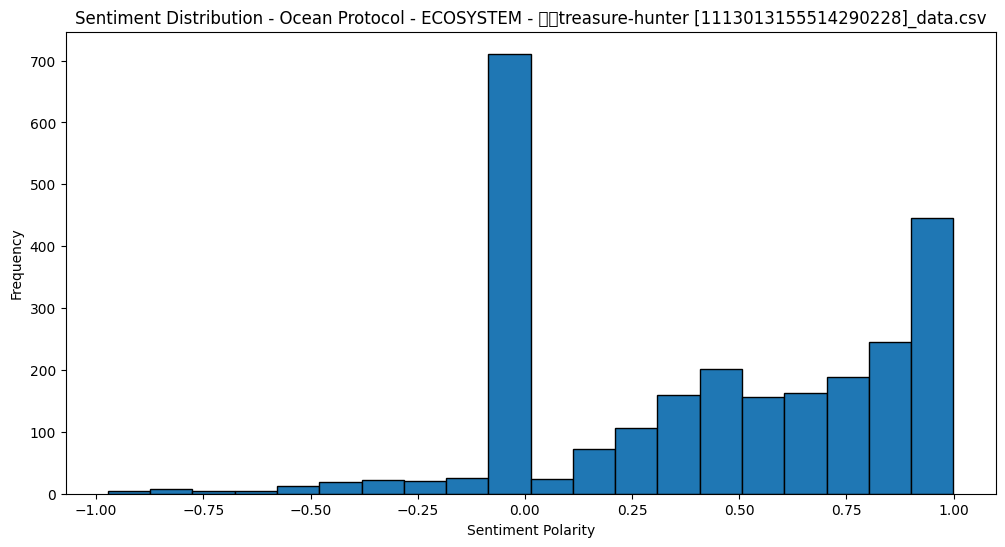

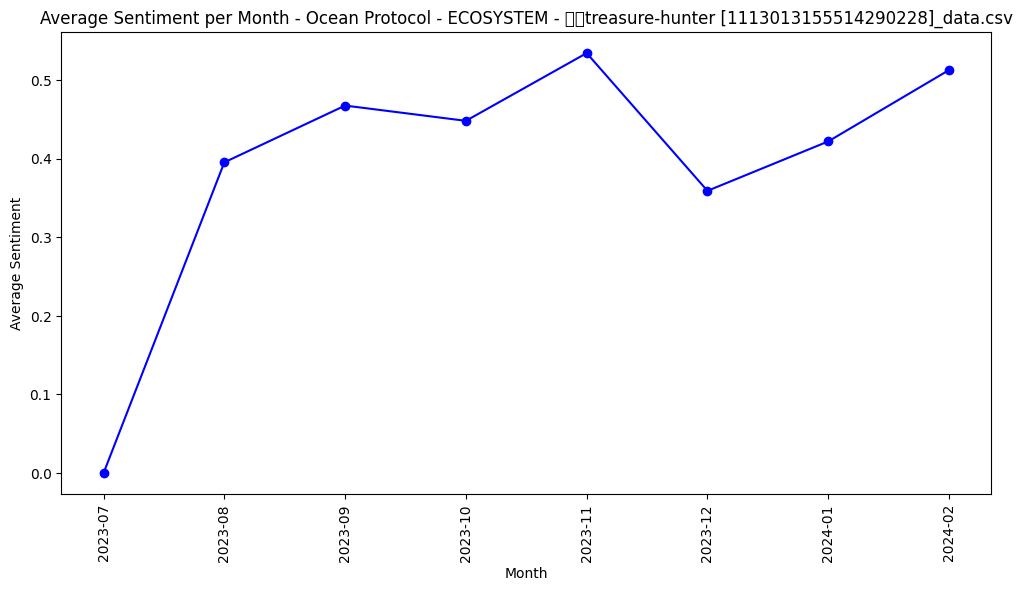

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128668 (\N{TRACTOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


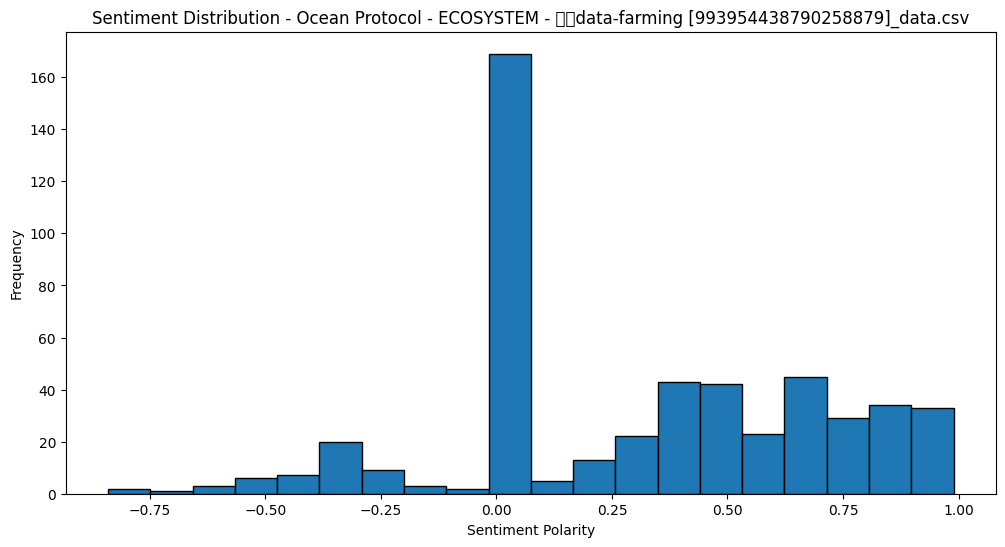

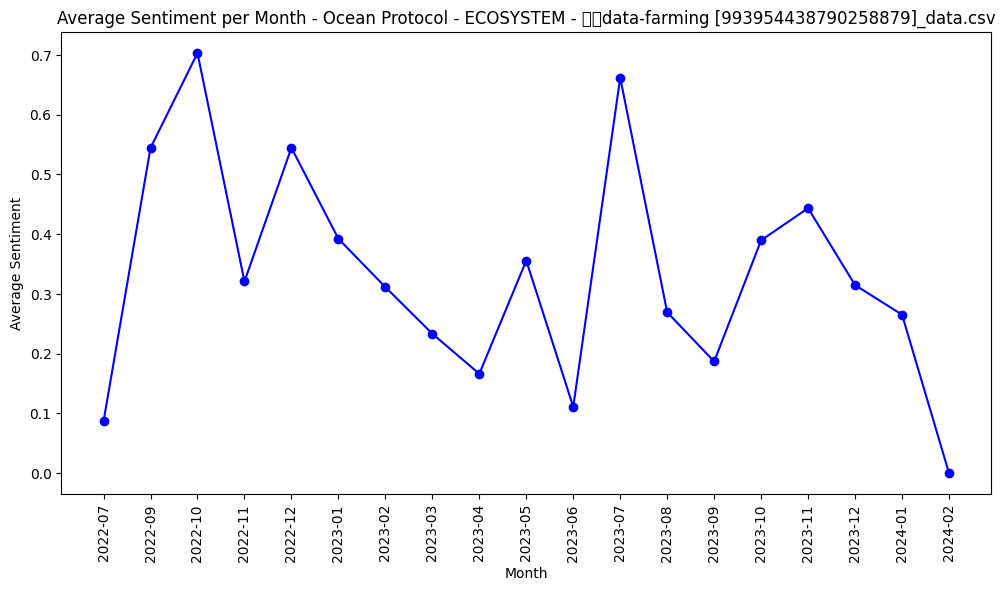

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


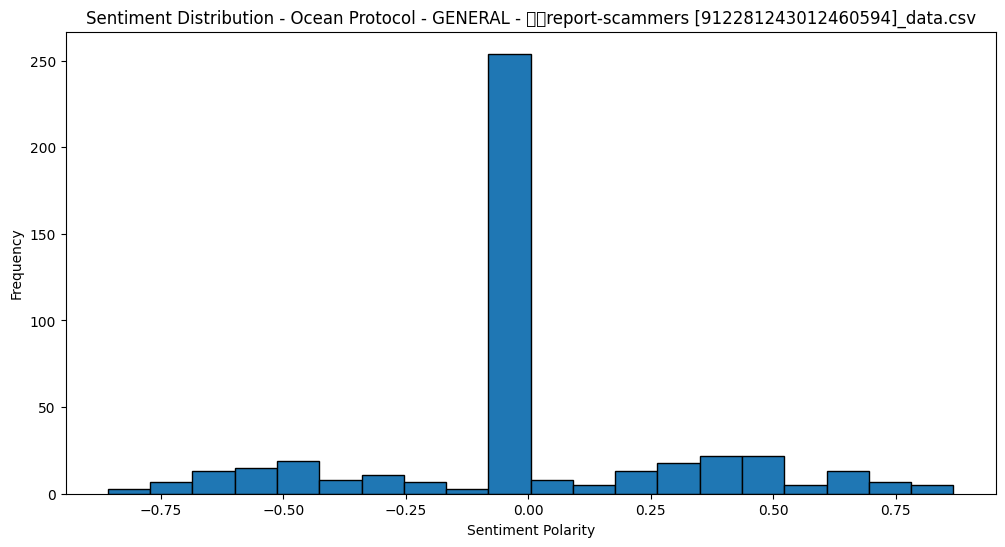

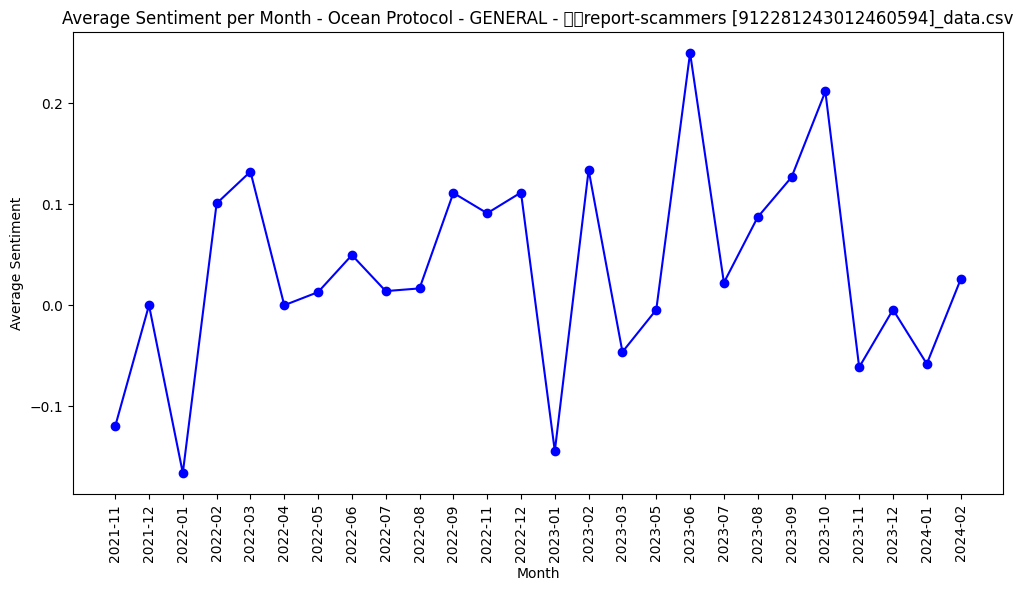

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


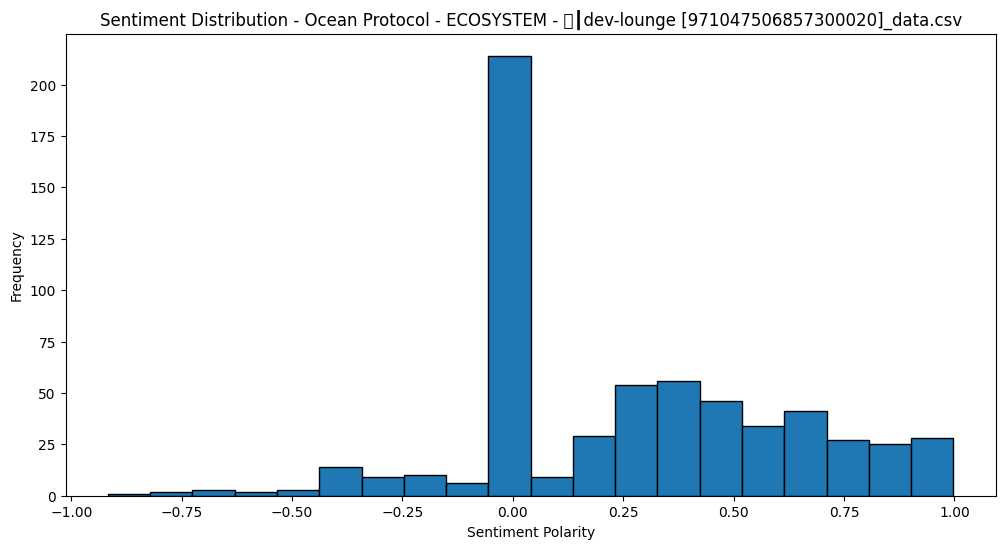

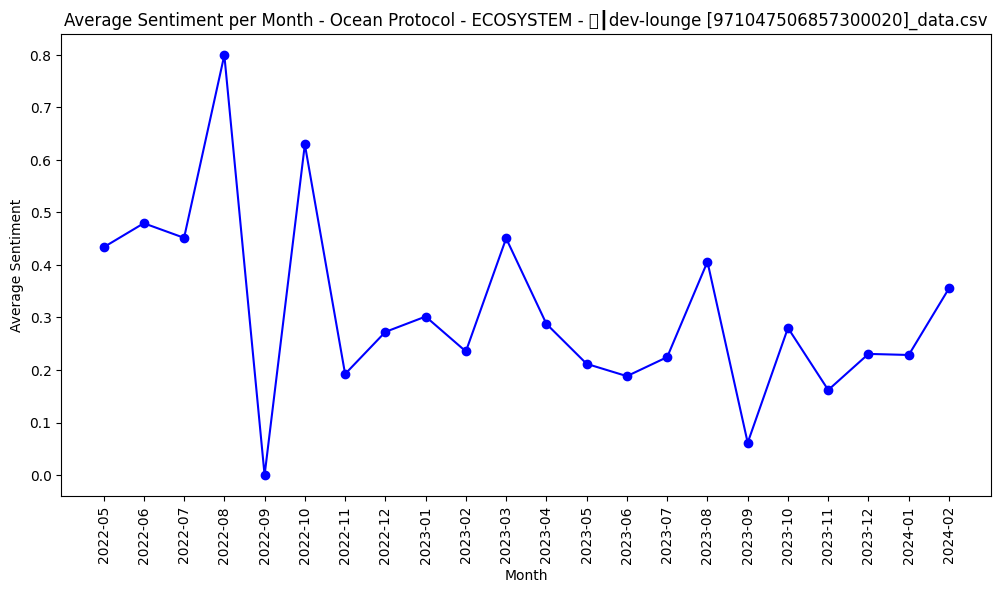

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


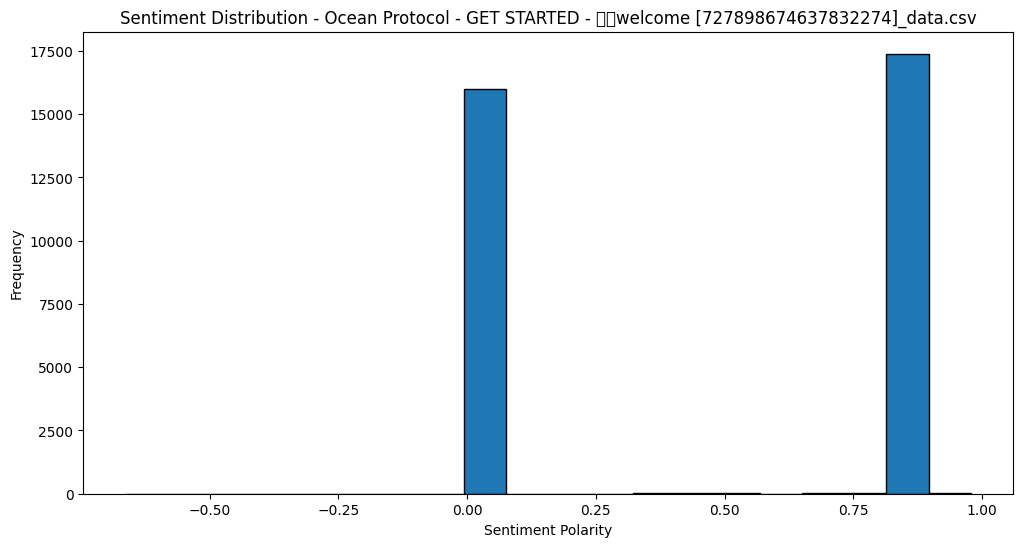

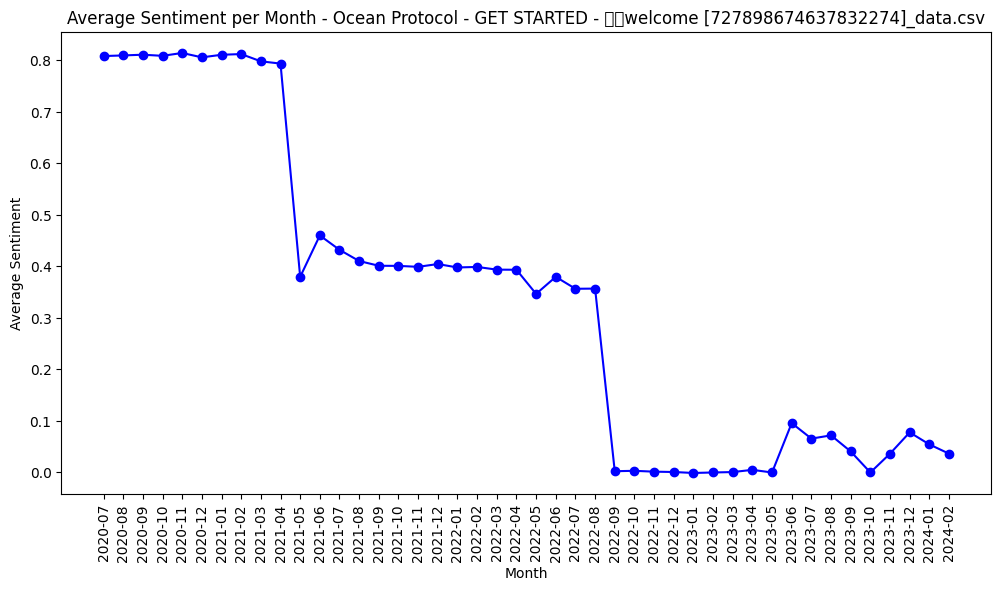

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


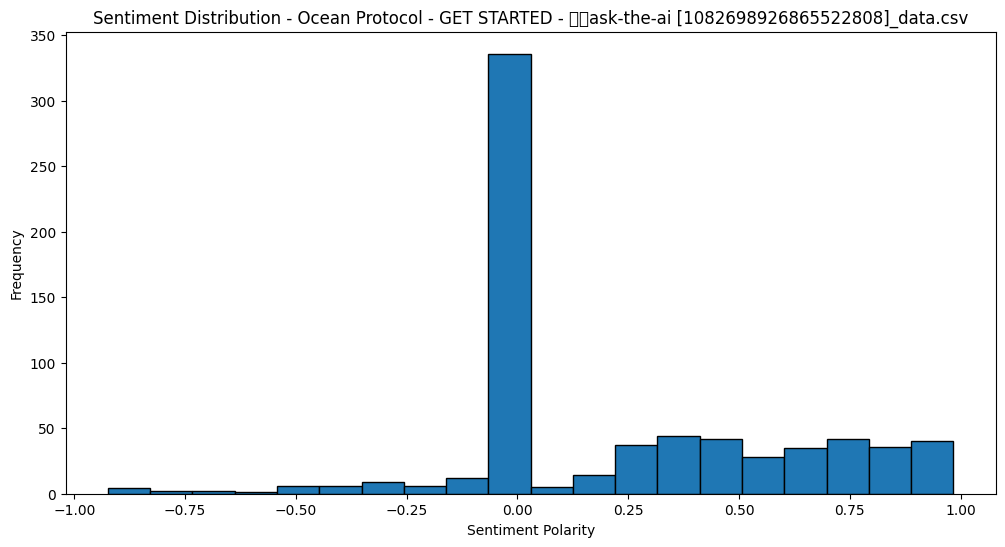

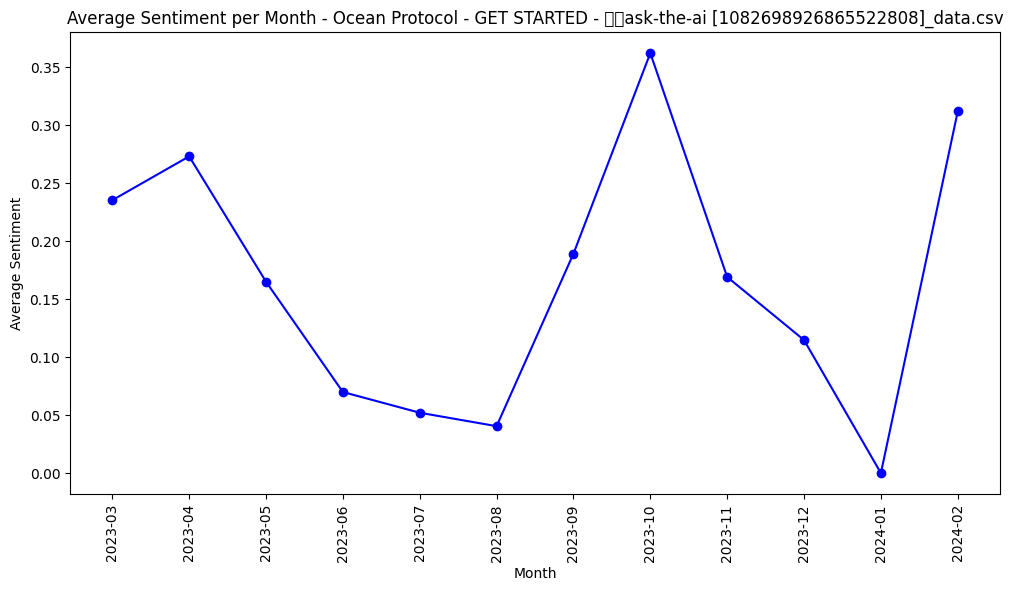

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


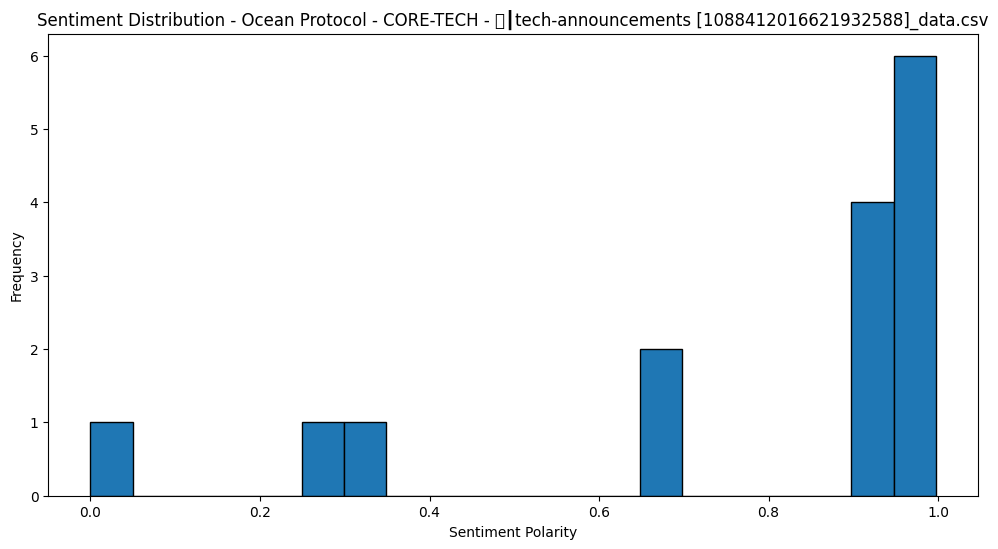

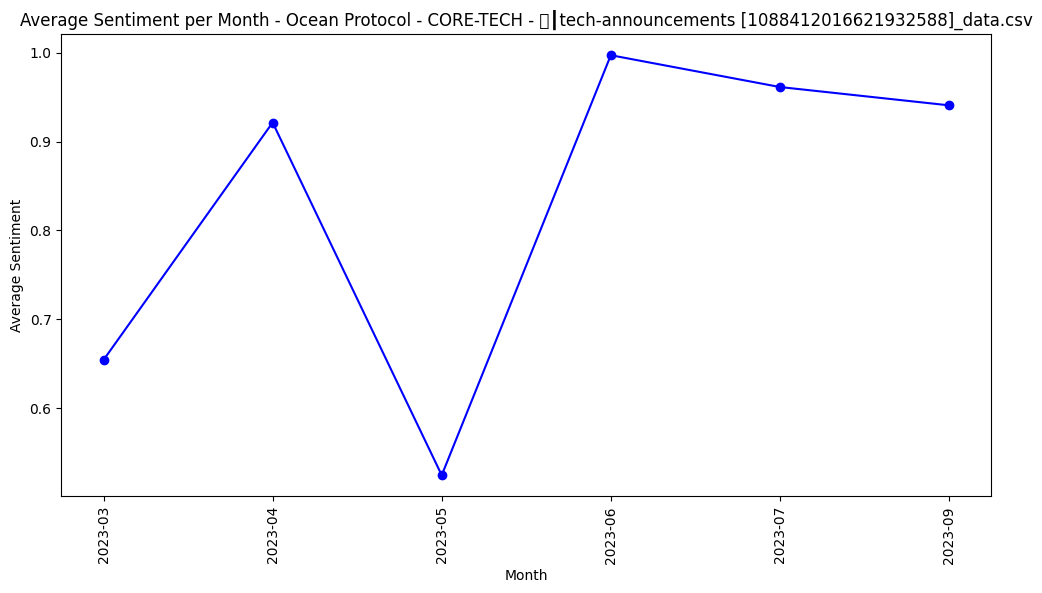

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128406 (\N{RAISED HAND WITH PART BETWEEN MIDDLE AND RING FINGERS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


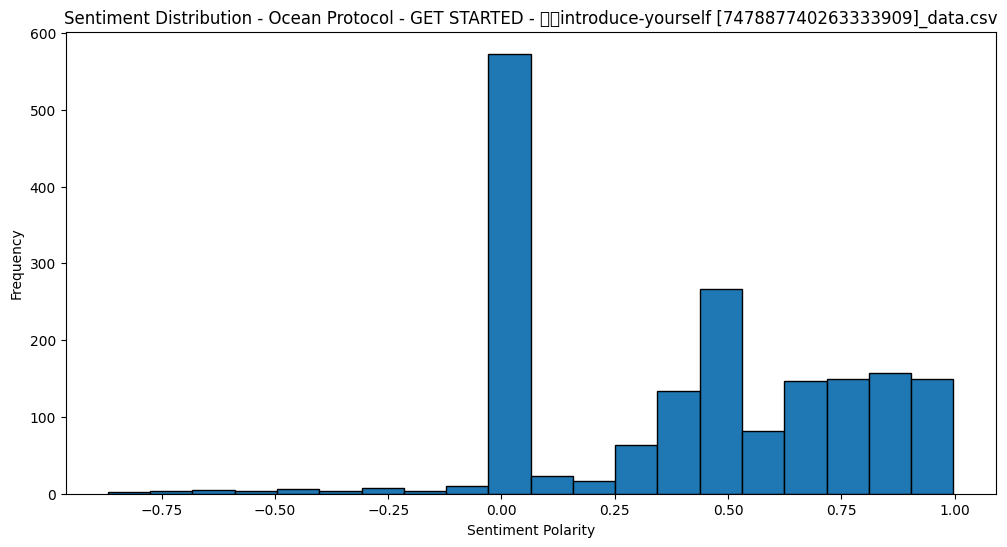

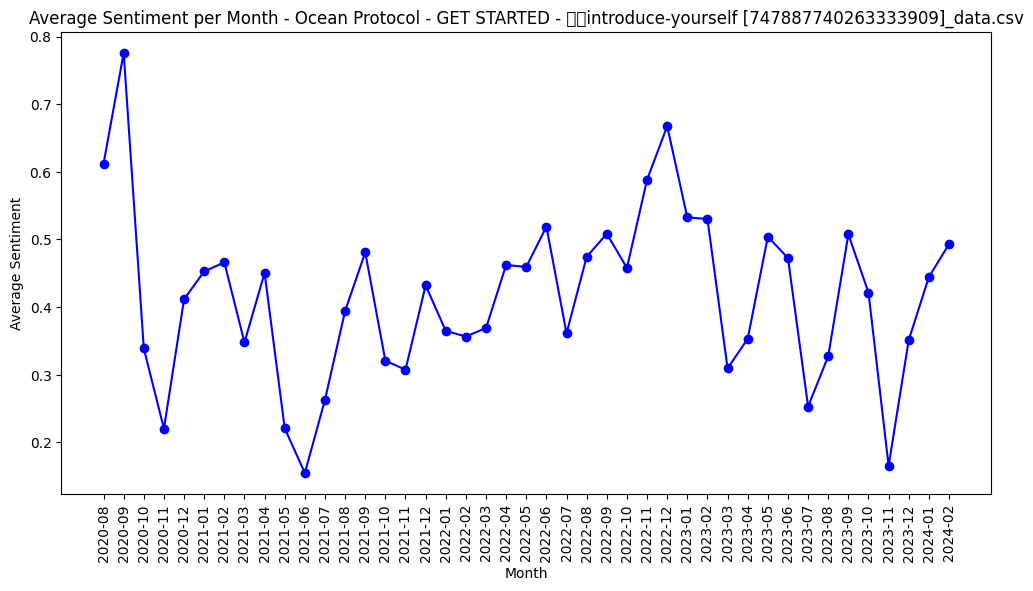

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128038 (\N{BIRD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


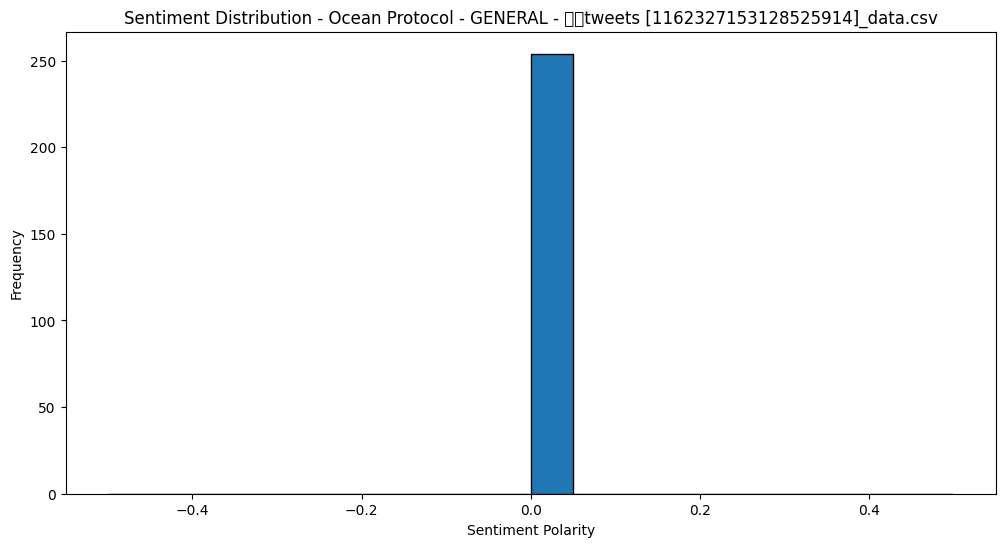

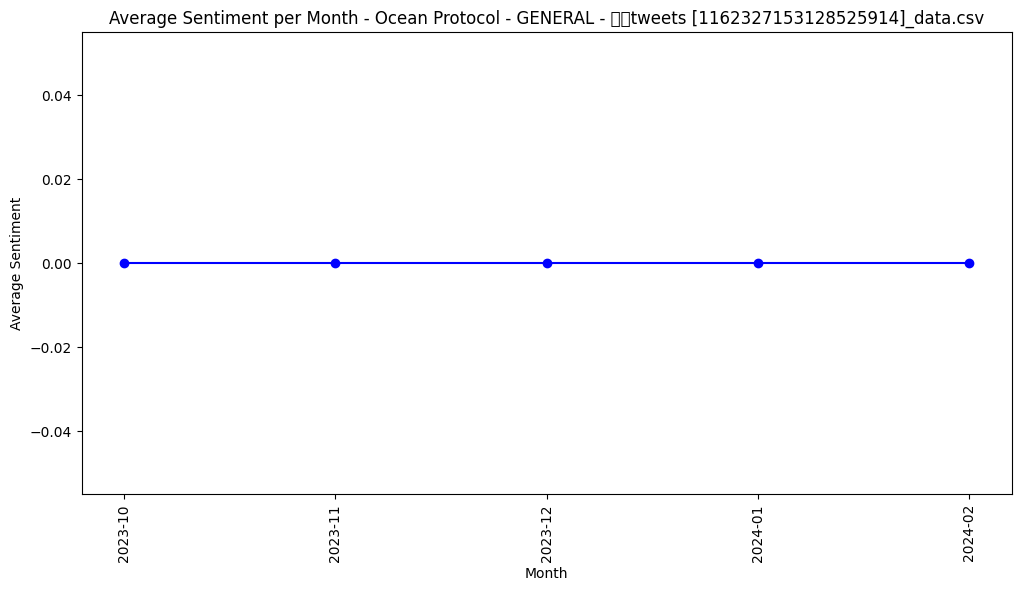

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


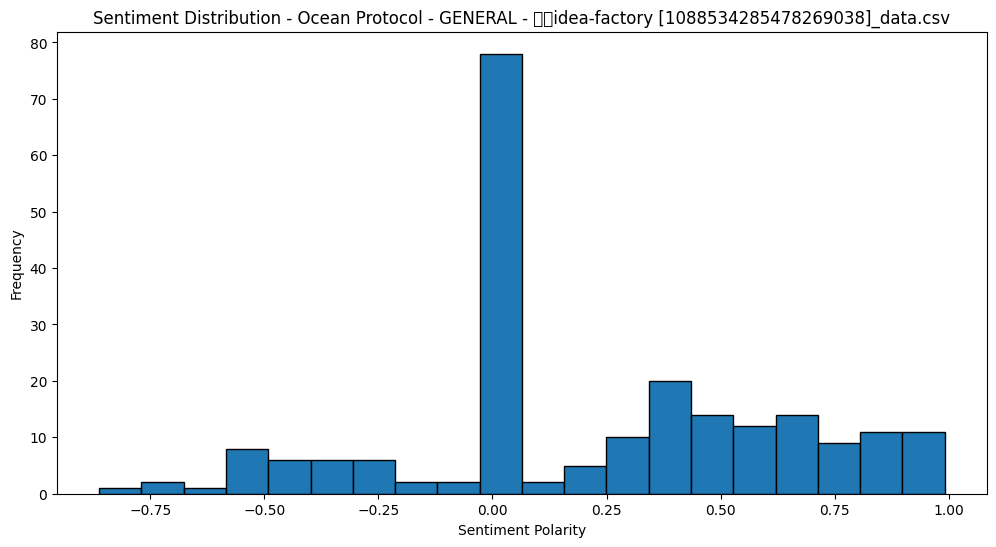

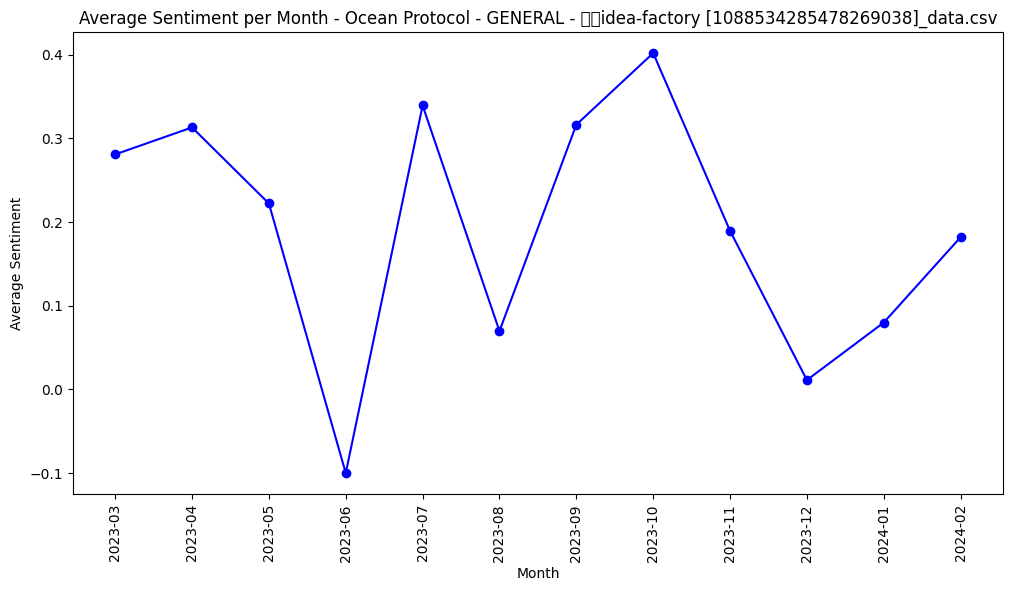

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


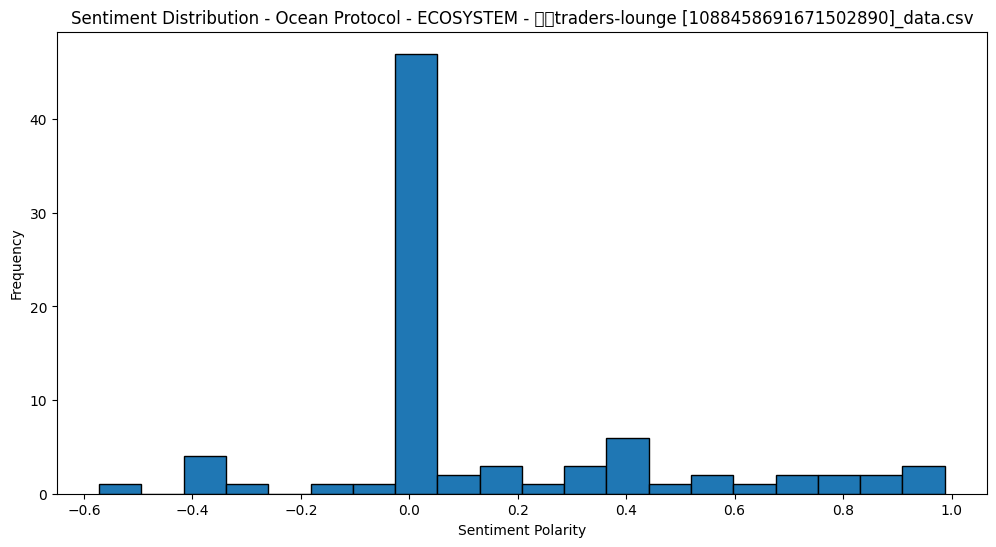

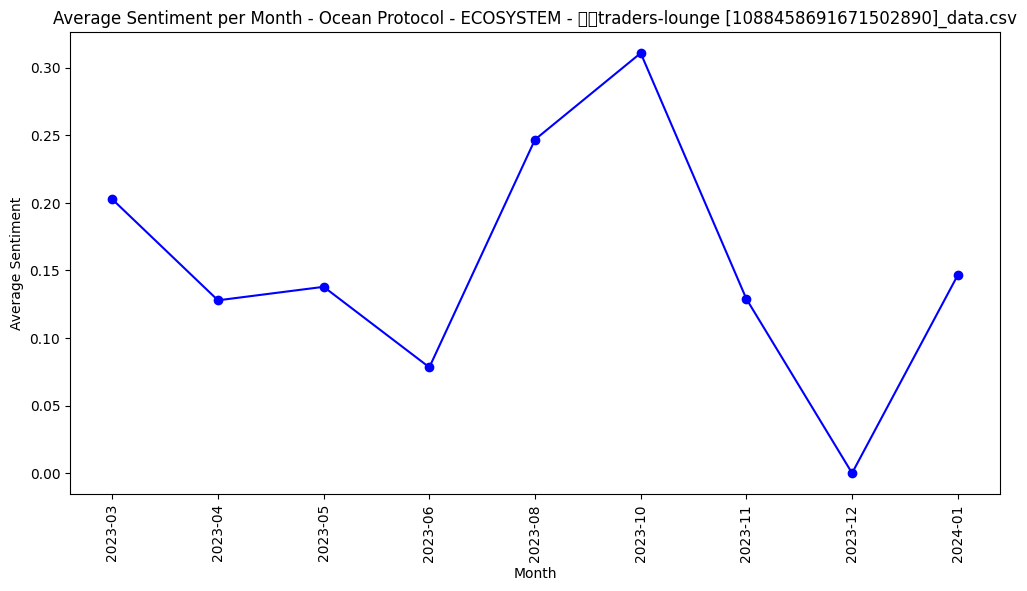

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


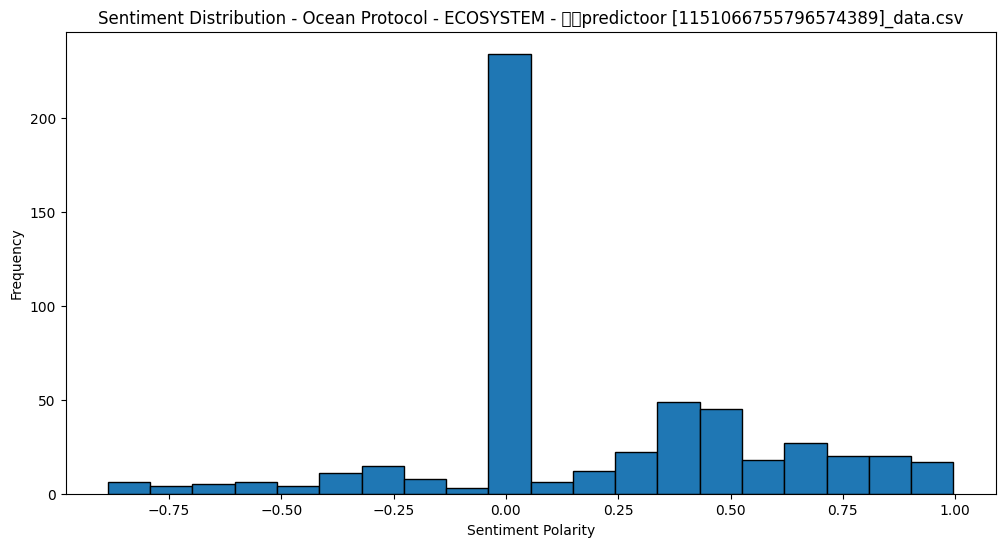

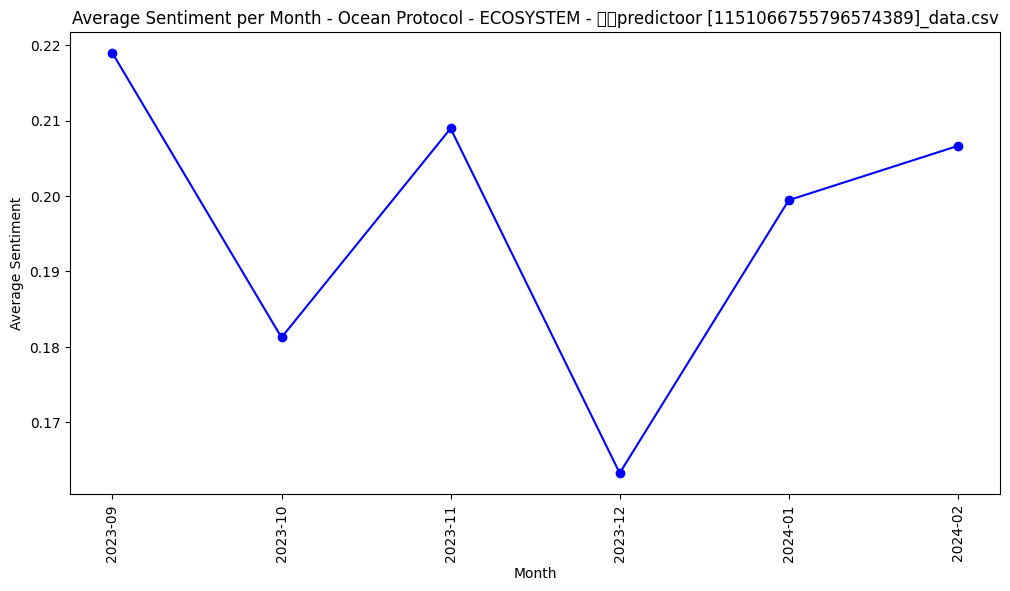

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128755 (\N{PASSENGER SHIP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


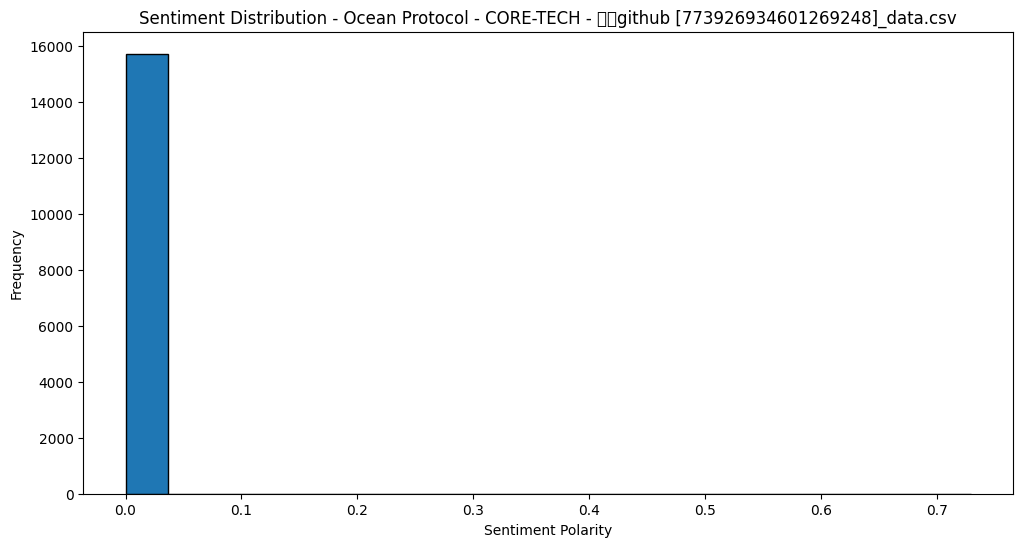

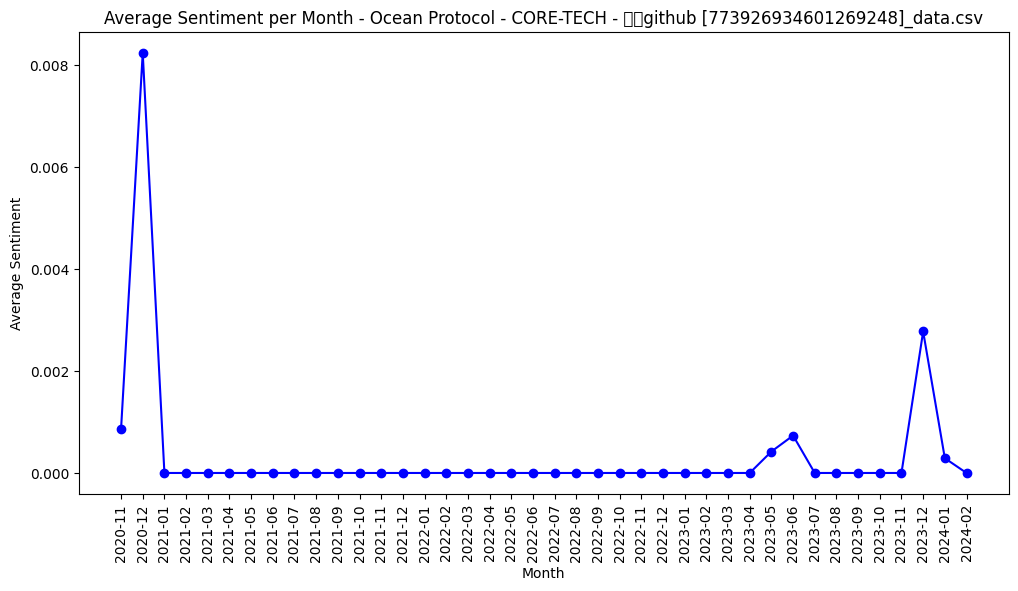

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128173 (\N{THOUGHT BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


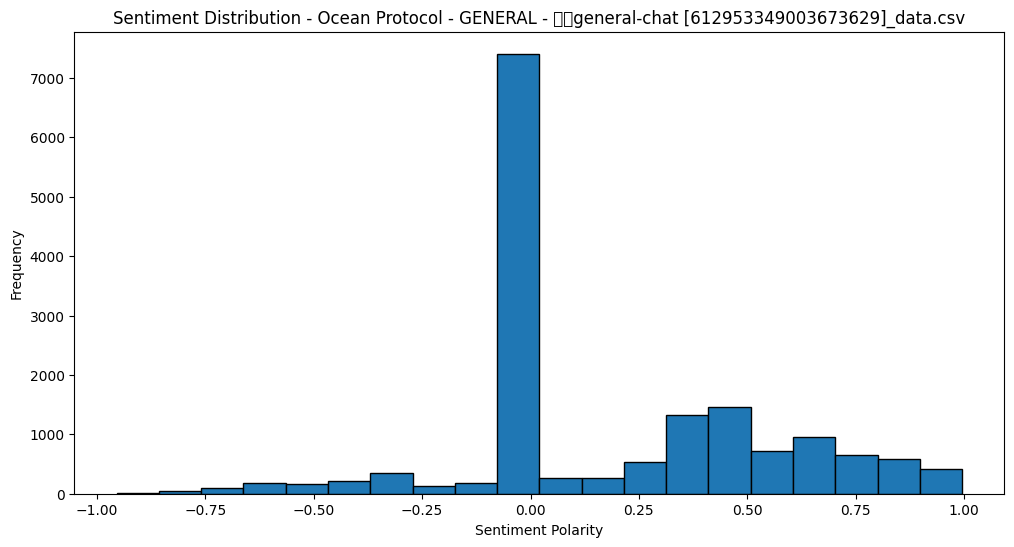

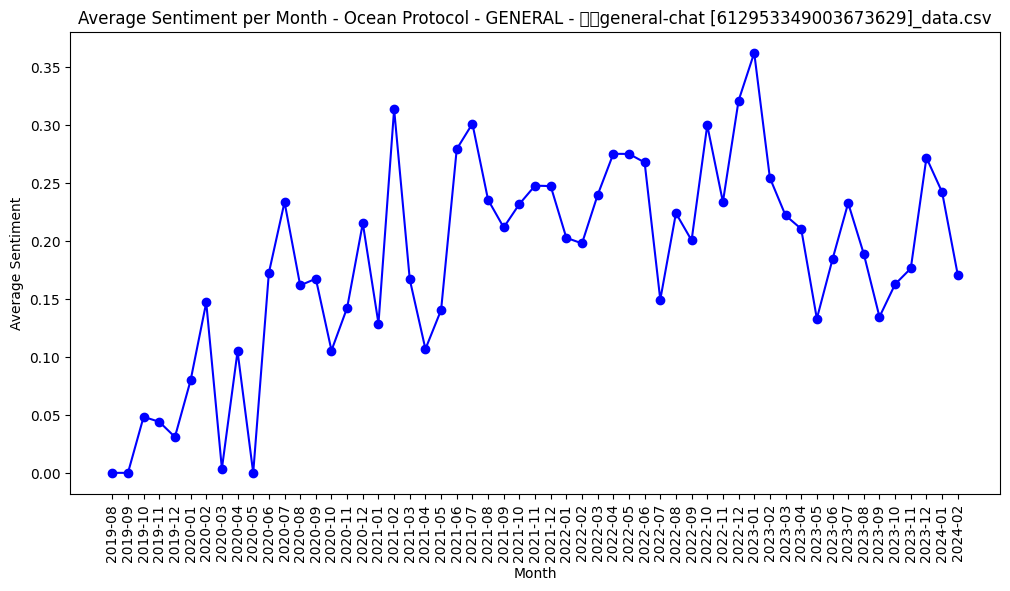

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


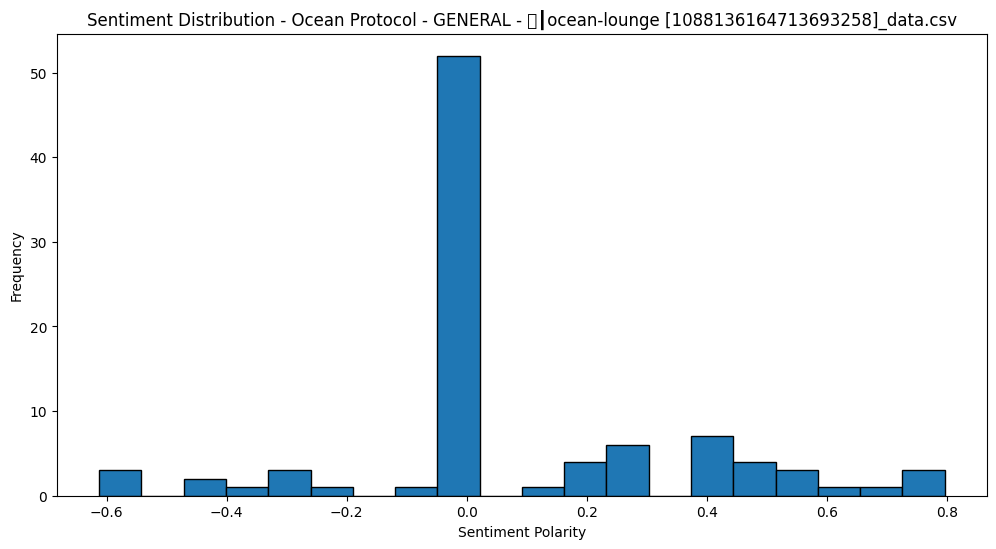

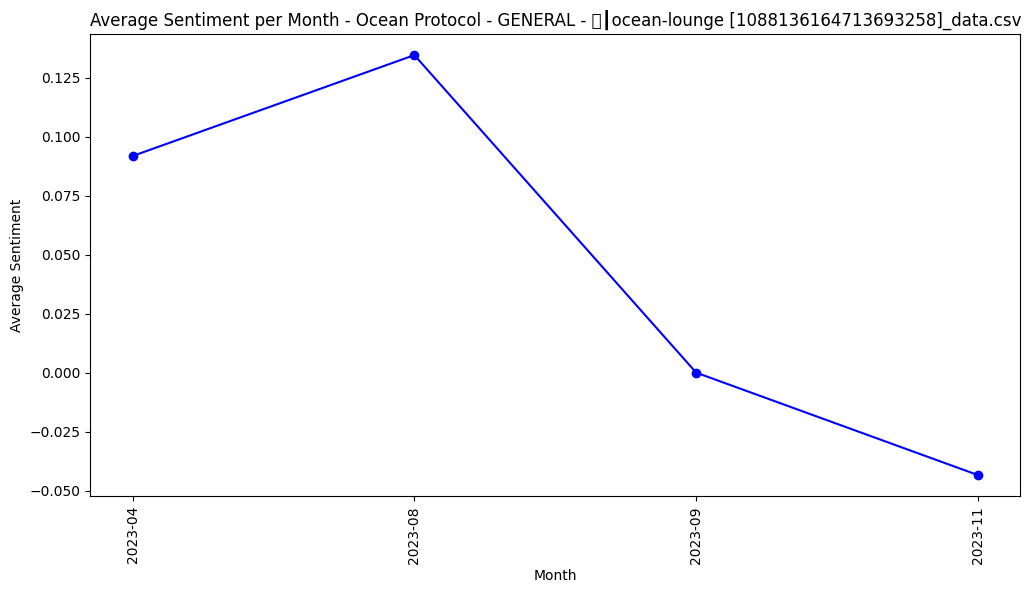

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


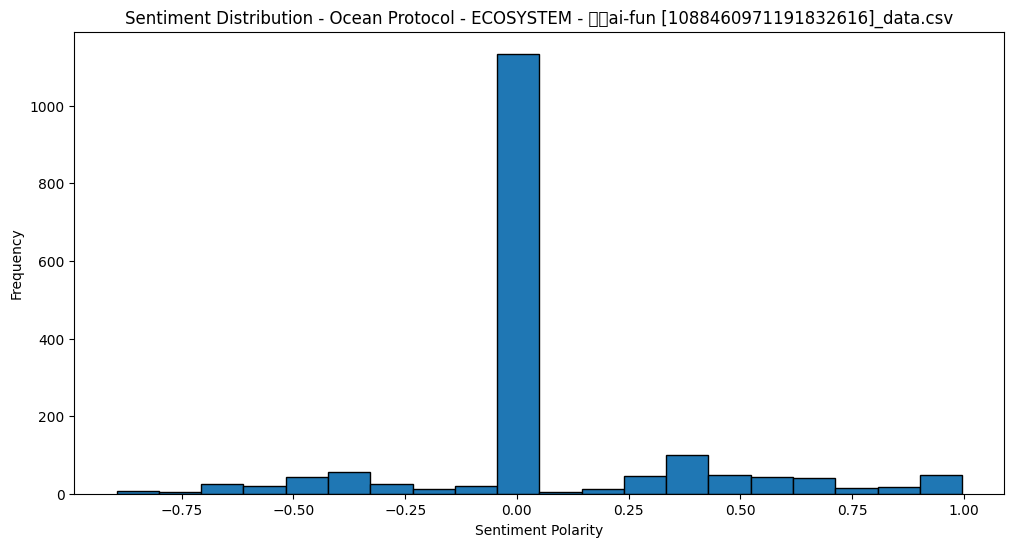

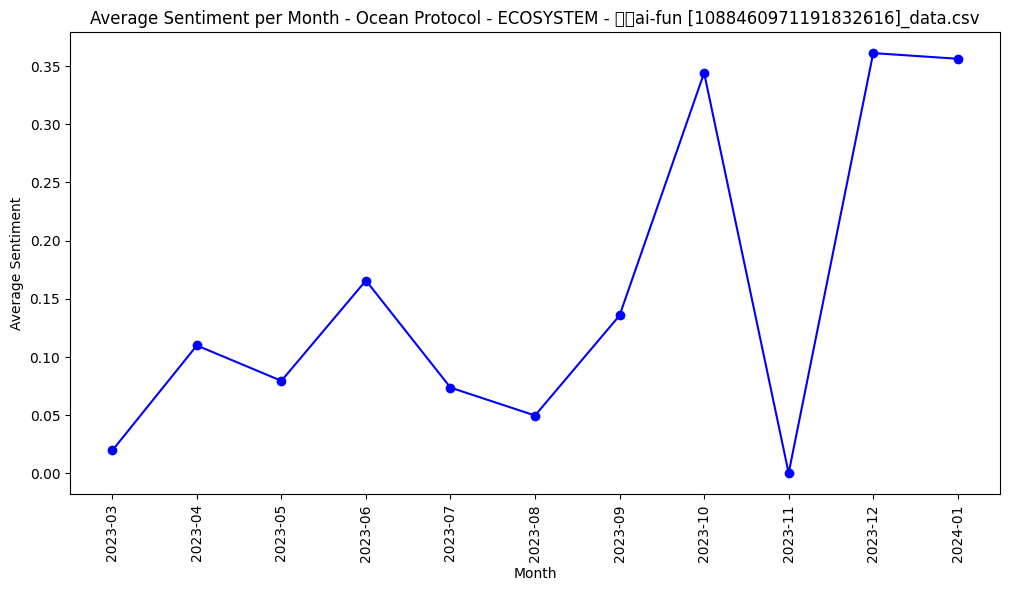

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


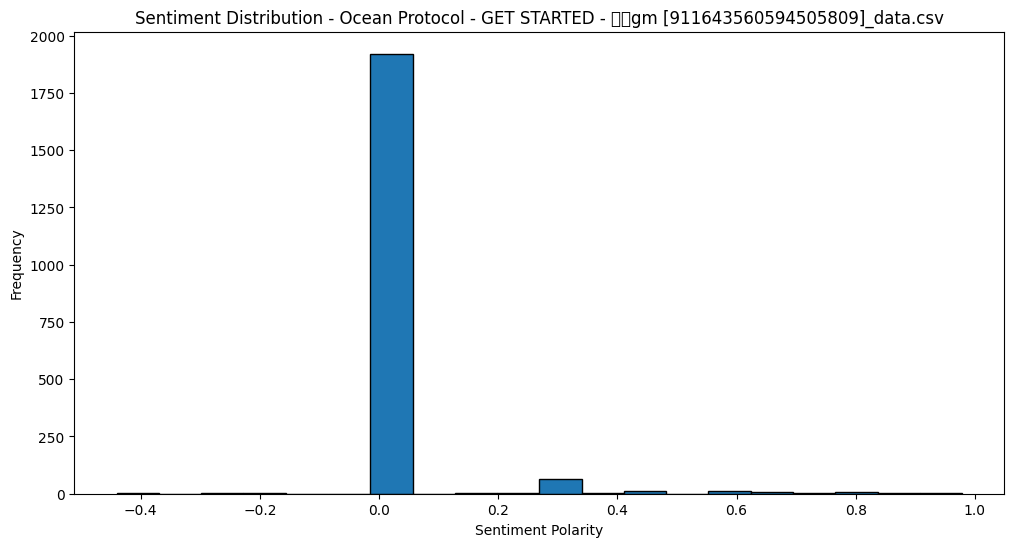

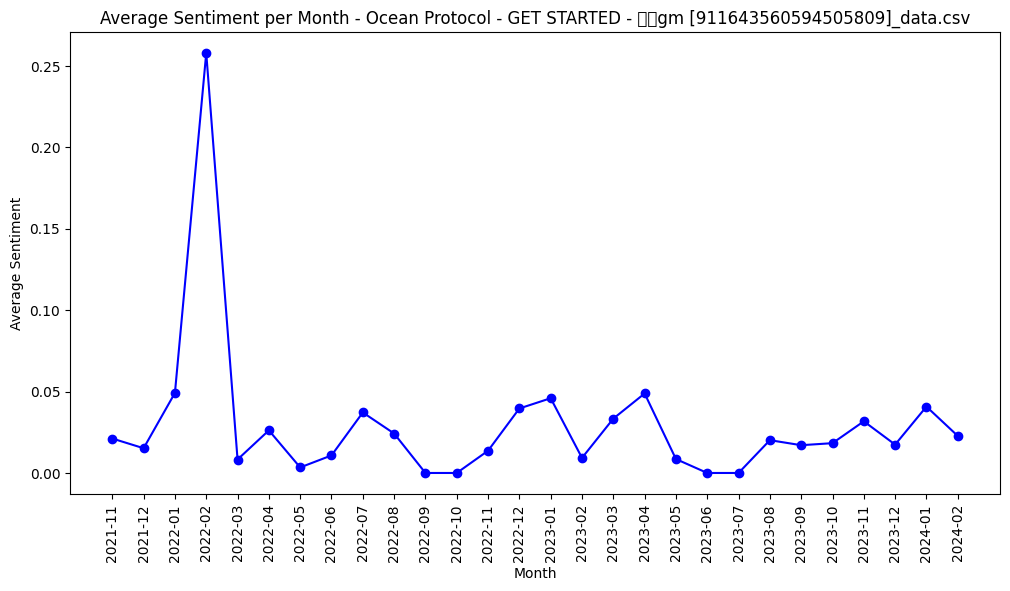

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


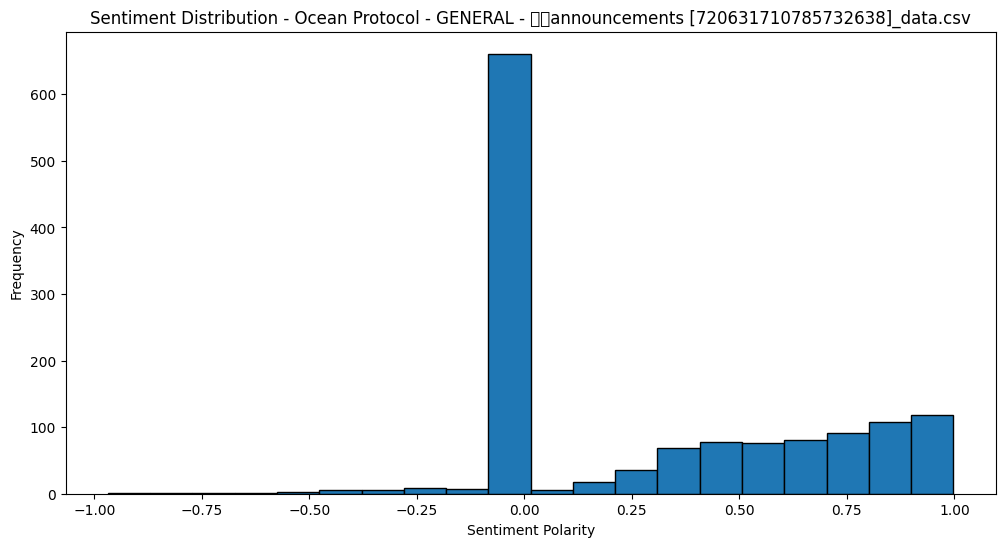

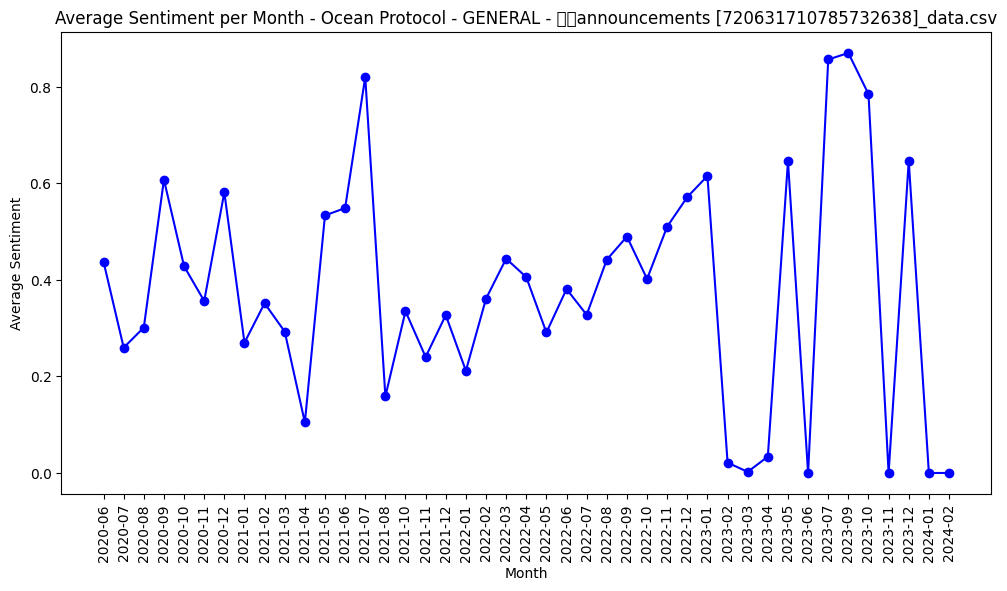

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


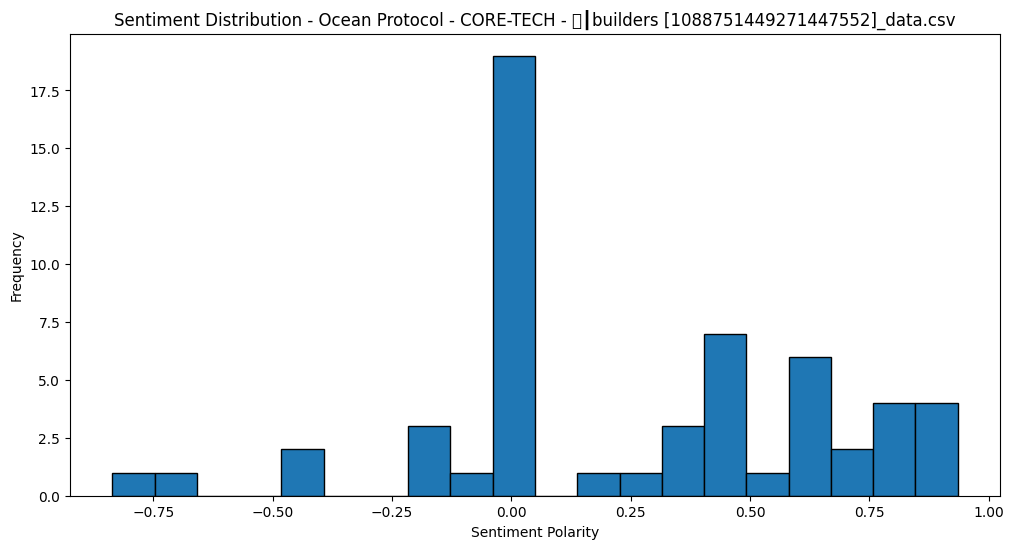

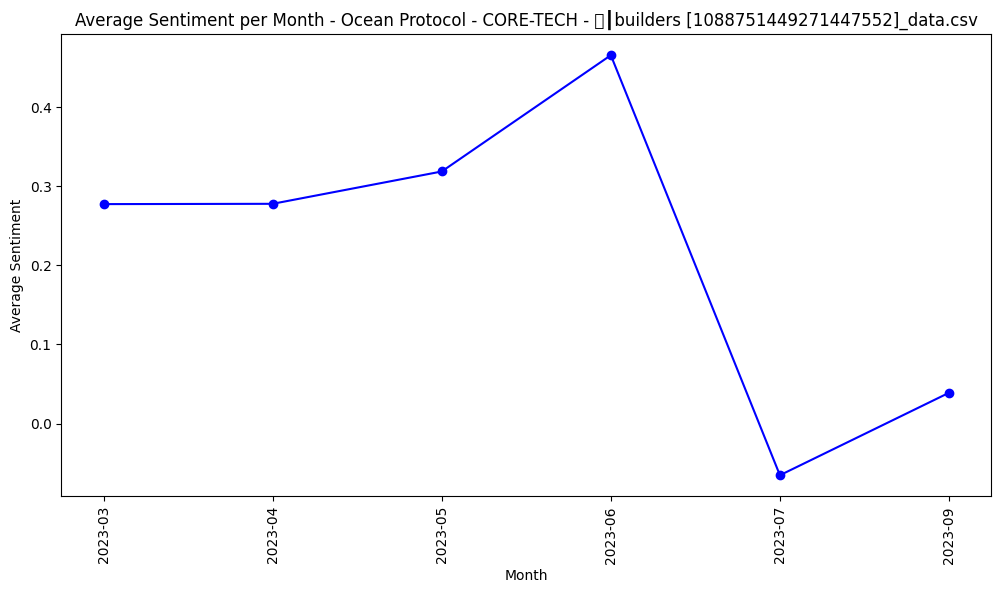

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


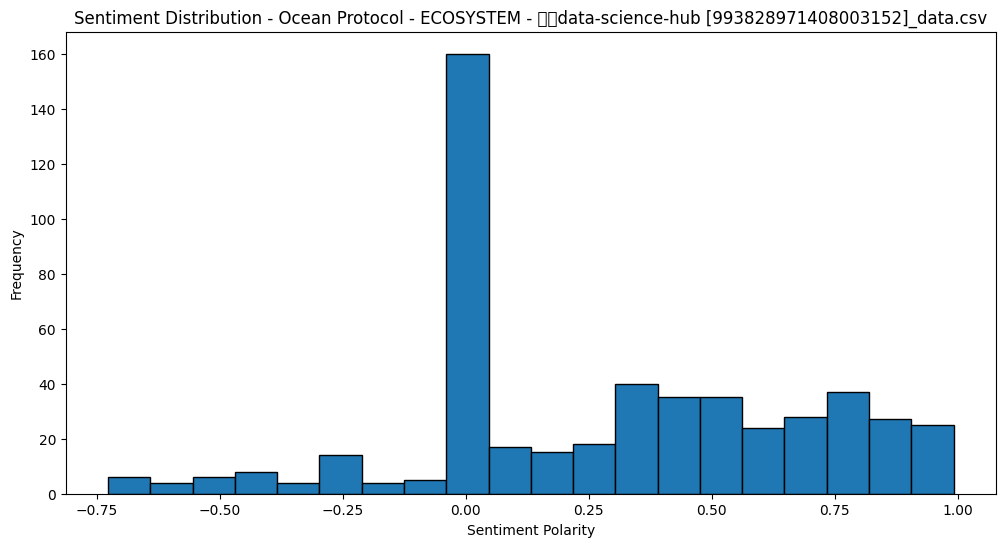

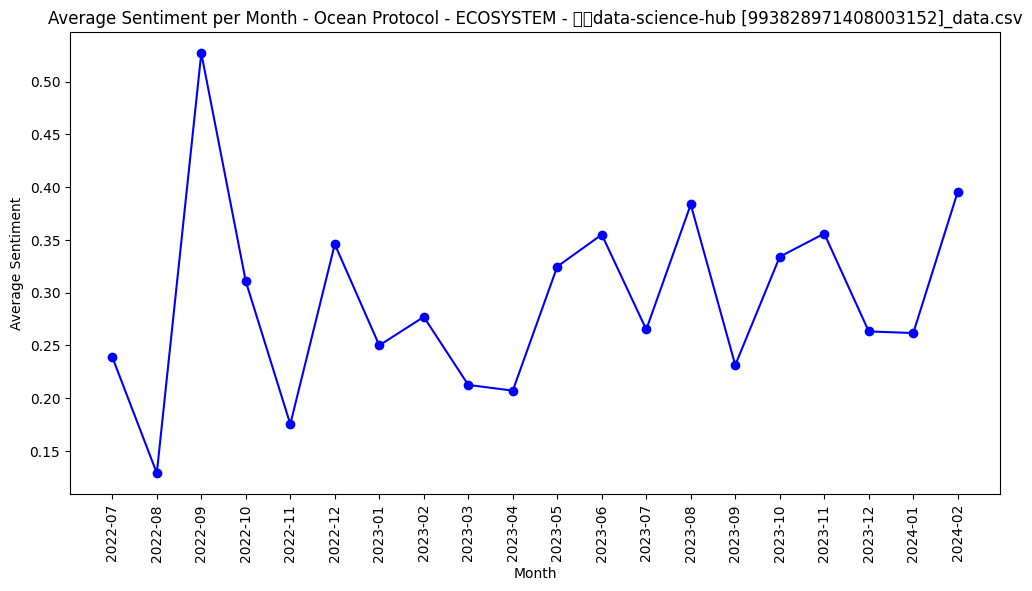

In [135]:
# Specify the path to the folder containing CSV files
folder_path = 'channels'
plt.rcParams['font.family'] = 'DejaVu Sans'

# Iterate through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        # Load CSV file into a Pandas DataFrame with 'Channel' as header
        df = pd.read_csv(file_path)

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

        # Check for missing values and fill with 'N/A'
        df['Content'].fillna('N/A', inplace=True)

        # Create a SentimentIntensityAnalyzer object
        sid = SentimentIntensityAnalyzer()

        # Apply sentiment analysis to 'Content' column
        df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

        # Resample data to monthly frequency and calculate average sentiment
        monthly_sentiment = df.groupby(df['Date'].dt.to_period("M")).agg({'sentiment': ['mean', 'count']}).reset_index()

        # Convert 'Date' back to string for plotting
        monthly_sentiment['Date'] = monthly_sentiment['Date'].astype(str)

        # Plot histogram of sentiment scores per month
        plt.figure(figsize=(12, 6))
        plt.hist(df['sentiment'], bins=20, edgecolor='black')
        plt.title(f'Sentiment Distribution - {filename}')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')
        plt.show()

        # Plot average sentiment per month
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_sentiment['Date'], monthly_sentiment['sentiment']['mean'], marker='o', linestyle='-', color='b')
        plt.title(f'Average Sentiment per Month - {filename}')
        plt.xlabel('Month')
        plt.ylabel('Average Sentiment')

        plt.xticks(rotation='vertical')
        plt.show()
